## Scientific Computation 2020 Lab 6 solution

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()


<Figure size 640x480 with 1 Axes>

Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

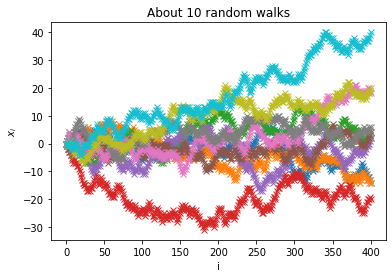

dt=2.744280


In [3]:
from time import time
def rwalk(Nt=400,M=400,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

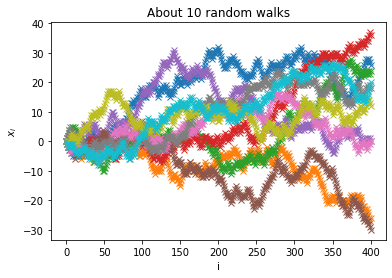

dt=0.007853


In [4]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    
    #**Modify code below and add code here**
    R = np.random.choice((-1,1),(Nt,M))
    
    #M Nt-step random walks (we could use np.cumsum and avoid this loop entirely)
    for i in range(Nt):
        x[i+1,:] = x[i,:] + R[i,:]

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk2(display=True)
print("dt=%f" %out[1])

How much faster is your new function?
Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$

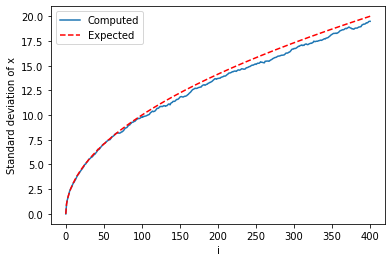

In [5]:
#For the values of M and N above, the vectorized version
#is about 200 times faster

#Add code here
X = out[0]
Xmean  = X.mean(axis=1)
Xstd = X.std(axis=1)
Nt = X.shape[0]
i = np.arange(Nt)
plt.plot(Xstd,'-')
plt.plot(np.sqrt(i),'r--')
plt.xlabel('i')
plt.ylabel('Standard deviation of x')
plt.legend(("Computed","Expected"))
plt.show()
    

What is the fraction of walkers at each position?

Text(0, 0.5, 'number of walkers')

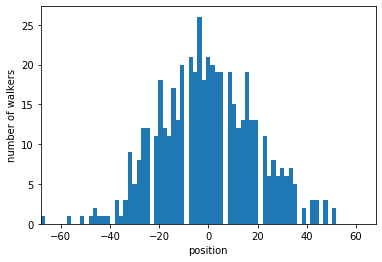

In [8]:
Xmax = np.max(np.abs(X[-1,:]))
plt.hist(X[-1,:],bins = int(Xmax)) #divide by M to get fraction
plt.xlim(-Xmax,Xmax)
plt.xlabel('position')
plt.ylabel('number of walkers')

Note: Solving the diffusion equation, $\frac{\partial f}{\partial t} = \mathcal{D} \frac{\partial ^2f}{\partial x^2}$ on the real line with initial condition, $f(x,t=0) = \delta(x)$, has solution, $f(x,t) = \sqrt{1/(4\pi \mathcal{D} t)} exp(-x^2/(4\mathcal{D} t))$

### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [6]:
import numpy as np
#Add code here
N = np.random.rand(3,3)
print(N)

[[0.46669128 0.54771604 0.70766138]
 [0.4110114  0.44604836 0.27682571]
 [0.30970291 0.38959271 0.39042607]]


2) Compute the eigenvalues and eigenvectors of N:

In [7]:
#Add code here
l,v = np.linalg.eig(N)
print('eigenvalues:',l)
print('eigenvectors (columns):\n',v)

eigenvalues: [1.29691888+0.j         0.00312341+0.06543119j 0.00312341-0.06543119j]
eigenvectors (columns):
 [[ 0.72837121+0.j          0.69193418+0.j          0.69193418-0.j        ]
 [ 0.50315369+0.j         -0.62189133-0.2553998j  -0.62189133+0.2553998j ]
 [ 0.46509326+0.j          0.02806626+0.26165148j  0.02806626-0.26165148j]]


3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [8]:
#Add code here
l1 = l[0]
I = np.eye(3)
check = np.linalg.det(N-np.dot(l1,I))
print(check)

(-4.926857660734333e-16+0j)


4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [9]:
#Add code here
v1 = v[:,0]
check = np.dot(N,v1)-l1*v1
print(check)

[-1.11022302e-16+0.j -2.22044605e-16+0.j -2.22044605e-16+0.j]


Note: floating point calculations by default use double precision which means there are about 15-16 digits of precision. Consequently, 1e-15 can be thought of as being equivalent to zero.